In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings ('ignore')
%matplotlib inline

# Import Data
Data from https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data 

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Data/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Data/house-prices-advanced-regression-techniques/test.csv')

# df_train = train.csv
# df_test = test.csv

In [ ]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

# Exploratory Data Analysis

## Info Data

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Statistic Descriptive Target Variable




In [ ]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## Histogram Target Variable

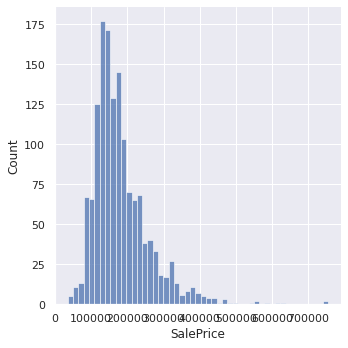

In [ ]:
sns.displot(df_train['SalePrice'])

## Skewness and Kurtosis Target Variable

In [ ]:
print('Skewness : %f' % df_train['SalePrice'].skew())
print('Kurtosis : %f' % df_train['SalePrice'].kurt())

# Skewness normal is 0
# Kurtosis normal is 3

Skewness : 1.882876
Kurtosis : 6.536282


## Scatterplot GrLivArea Based on Target Variable

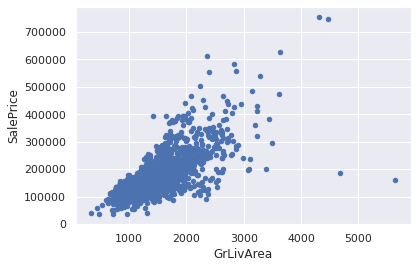

In [ ]:
data = pd.concat([df_train['SalePrice'], df_train['GrLivArea']], axis = 1)
data.plot.scatter( x = 'GrLivArea', y = 'SalePrice')

In [ ]:
data.head()

SalePrice  GrLivArea
0     208500       1710
1     181500       1262
2     223500       1786
3     140000       1717
4     250000       2198

## Scatterplot TotalBsmtSF Based on Target Variable

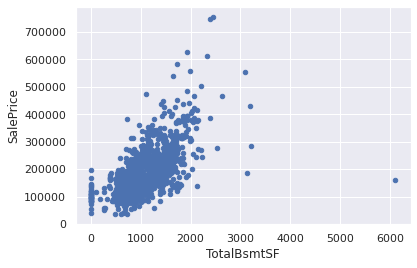

In [ ]:
data = pd.concat([df_train['SalePrice'], df_train['TotalBsmtSF']], axis = 1)
data.plot.scatter(x = 'TotalBsmtSF', y = 'SalePrice')

## Boxplot OverallQual Based on Target Variable

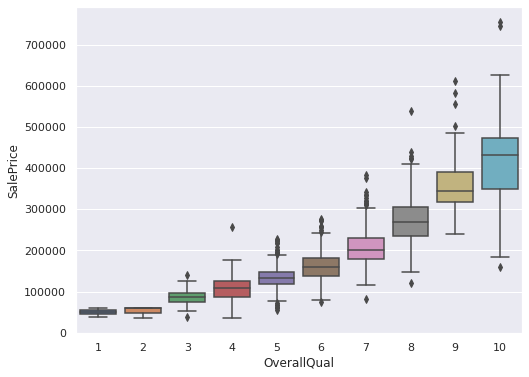

In [ ]:
data = pd.concat([df_train['SalePrice'], df_train['OverallQual']], axis = 1)
f, ax = plt.subplots(figsize = (8,6))
fig = sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = data)

## Boxplot YearBuild Based on Target Variable

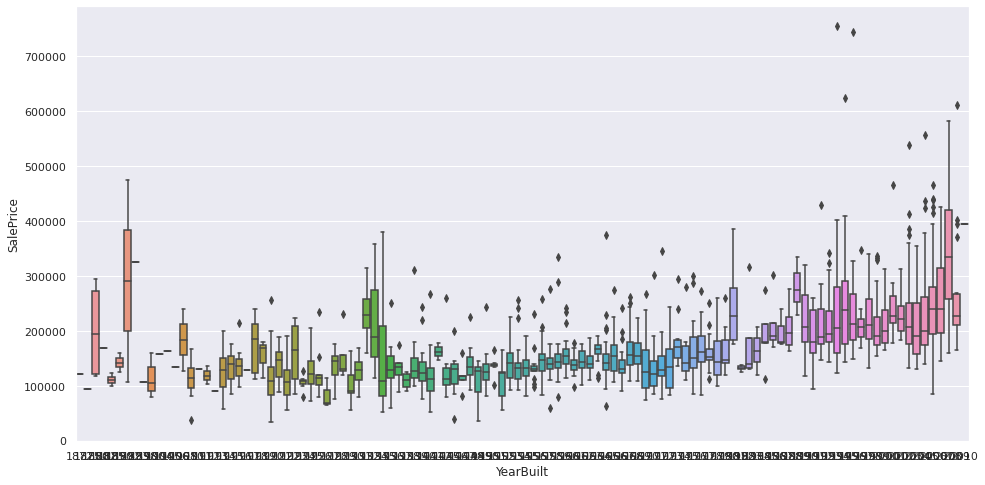

In [ ]:
data = pd.concat([df_train['SalePrice'], df_train['YearBuilt']], axis = 1)
f, ax = plt.subplots(figsize = (16,8))
fig = sns.boxplot(x = 'YearBuilt', y = 'SalePrice', data = data)

## Correlation Map of Variables

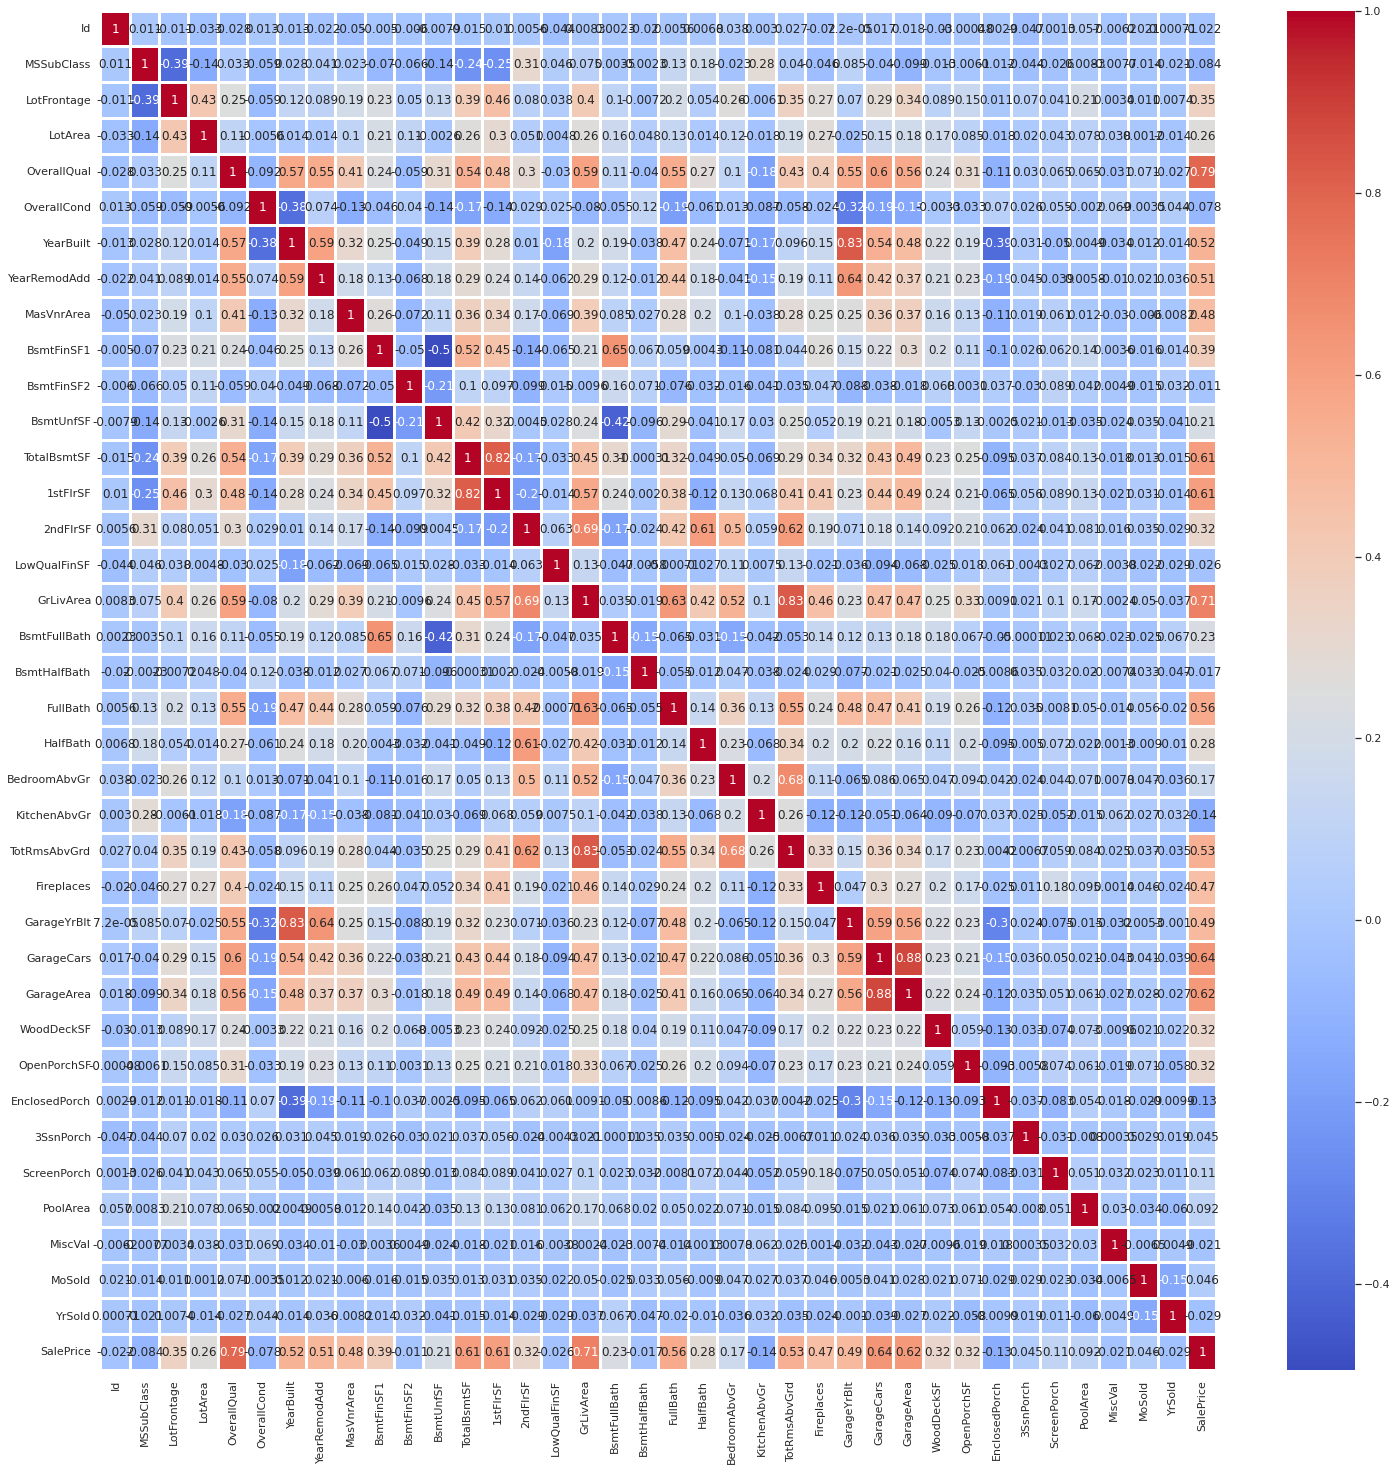

In [ ]:
plt.figure(figsize =(25,25))
ax = sns.heatmap(df_train.corr(), cmap = 'coolwarm', annot = True, linewidth = 2)

## Finding Correlation Map on Target Variable >= 0.5

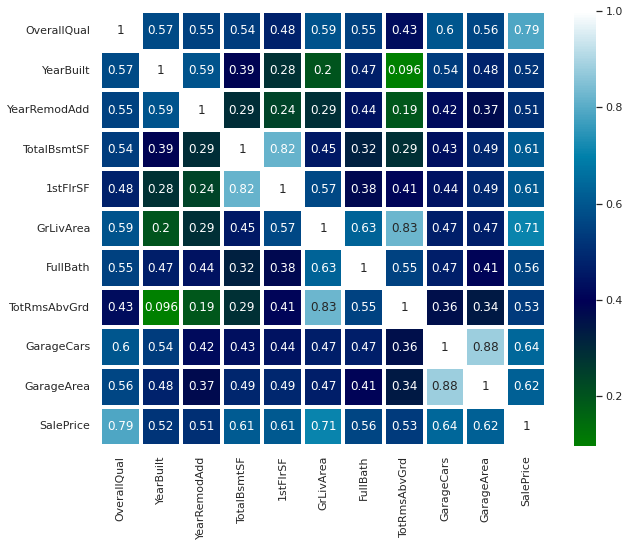

In [ ]:
hig_corr = df_train.corr()
hig_corr_features = hig_corr.index[abs(hig_corr['SalePrice']) >= .5]

plt.figure(figsize = (10,8))
ax = sns.heatmap(df_train[hig_corr_features].corr(), cmap = 'ocean', annot = True, linewidth = 3)

## Pairplot Variables Based on Target Variable with Correlation >= .5 

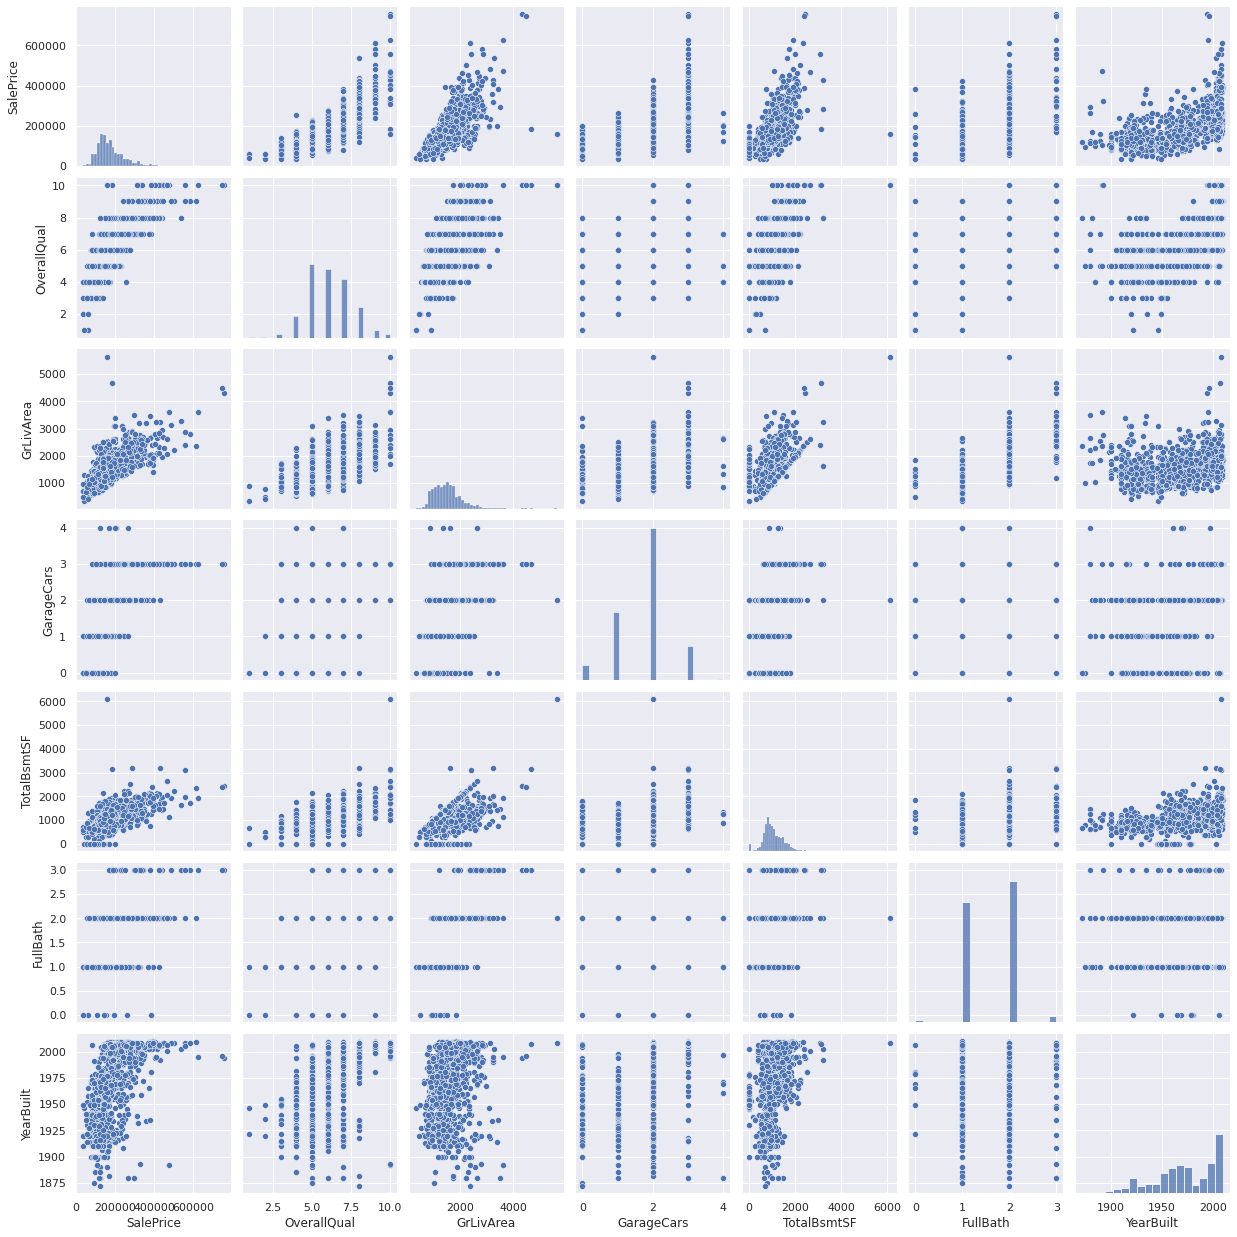

In [ ]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size =2.5)
plt.show()

# Data Prepocessing

## Normalize and Target Distribution

/ mu =  180921.195890 and sigma =  79415.291886 



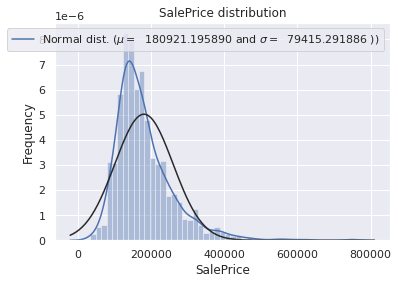

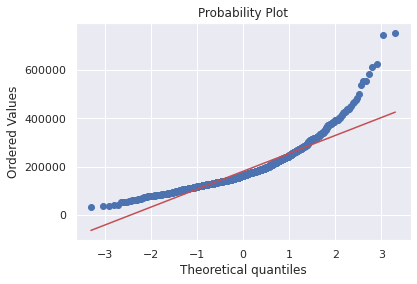

In [ ]:
sns.distplot(df_train['SalePrice'], fit = norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '/ mu = {: 2f} and sigma = {: 2f} \n'.format(mu, sigma))

# Now plot the distribution
plt.legend(['Normal dist. ($\mu = $ {: 2f} and $\sigma = $ {: 2f} ))'.format(mu, sigma)],
           loc = 'best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

# Gel The QQ.plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot = plt)
plt.show()

## Transformed Log on Target Variable

/ mu =  12.024057 and sigma =  0.399312 



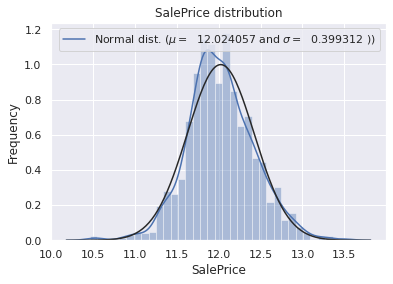

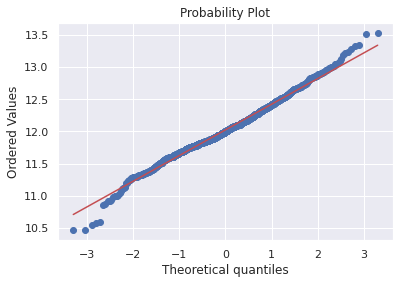

In [ ]:
# We use the numpy function log1p witch applies log(1+x) to all elements of the column
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])

# Check he new distribution
sns.distplot(df_train['SalePrice'], fit = norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '/ mu = {: 2f} and sigma = {: 2f} \n'.format(mu, sigma))

# Now plot the distribution
plt.legend(['Normal dist. ($\mu = $ {: 2f} and $\sigma = $ {: 2f} ))'.format(mu, sigma)],
           loc = 'best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

# Gel The QQ.plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot = plt)
plt.show()

## Combining Train and Test Data

In [ ]:
ntrain = df_train.shape[0]
ntest = df_test.shape[0]
y_train = df_train.SalePrice.values
all_data = pd.concat((df_train, df_test)).reset_index(drop = True)
all_data.drop(['SalePrice'], axis = 1, inplace = True)
print('All data size is : {}'.format(all_data.shape))

All data size is : (2919, 80)


## Counting Missing Values

In [ ]:
total = all_data.isnull().sum().sort_values(ascending = False)
percent = (all_data.isnull().sum()/all_data.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head()

Total   Percent
PoolQC        2909  0.996574
MiscFeature   2814  0.964029
Alley         2721  0.932169
Fence         2348  0.804385
FireplaceQu   1420  0.486468

## Missing Values Treatment

### N/A = empty (Categoric)

In [ ]:
all_data['PoolQC'] = all_data['PoolQC'].fillna('None')

In [ ]:
all_data['MiscFeature'] = all_data['MiscFeature'].fillna('None')

In [ ]:
all_data['Alley'] = all_data['Alley'].fillna('None')

In [ ]:
all_data['Fence'] = all_data['Fence'].fillna('None')

In [ ]:
all_data['FireplaceQu'] = all_data['FireplaceQu'].fillna('None')

In [ ]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
            'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
  all_data[col] = all_data[col].fillna('None')

In [ ]:
all_data['MasVnrType'] = all_data['MasVnrType'].fillna('None')

In [ ]:
all_data['MSSubClass'] = all_data['FireplaceQu'].fillna('None')

### N/A = empty (Numeric)

In [ ]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars',
            'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
  all_data[col] = all_data[col].fillna('0')

In [ ]:
all_data['MasVnrArea'] = all_data['MasVnrArea'].fillna('0')

### N/A = no info from description, fill modus (Numeric)

In [ ]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [ ]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

In [ ]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [ ]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

In [ ]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

### N/A = no info, fill median (Numeric)

In [ ]:
# Group by neighboarhood and fill in missing values by the median LotFrontage of all the neighborhood
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median()))

### N/A = Typ (Typical)

In [ ]:
all_data['Functional'] = all_data['Functional'].fillna('Typ')

## Drop Column because Almost is AllPub

In [ ]:
all_data.groupby('Utilities').size()

Utilities
AllPub    2916
NoSeWa       1
dtype: int64

In [ ]:
all_data = all_data.drop(['Utilities'], axis = 1)

## Check Missing Values

In [ ]:
# Check remaining missing value if any
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending = False)
missing_data = pd.DataFrame({'Missing Ratio' : all_data_na})
missing_data

Empty DataFrame
Columns: [Missing Ratio]
Index: []

## Change Data Type from Numeric into Categoric

In [ ]:
# MSSubClass = The Building Class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str) 

# Changing OverallCond into a Categorical Variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)

# Year and Month Sold are Transform into Categorical Feature 
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

## Feature Engineering

### Label Encoder

In [ ]:
all_data.nunique()

Id               2919
MSSubClass          6
MSZoning            5
LotFrontage       130
LotArea          1951
Street              2
Alley               3
LotShape            4
LandContour         4
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         118
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        445
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            5
BsmtCond            5
BsmtExposure        5
BsmtFinType1        7
BsmtFinSF1        992
BsmtFinType2        7
BsmtFinSF2        273
BsmtUnfSF        1136
TotalBsmtSF      1059
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF         1083
2ndFlrSF          635
LowQualFinSF       36
GrLivArea 

In [ ]:
pd.set_option('display.max_rows', None)
all_data.nunique()

Id               2919
MSSubClass          6
MSZoning            5
LotFrontage       130
LotArea          1951
Street              2
Alley               3
LotShape            4
LandContour         4
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         118
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        445
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            5
BsmtCond            5
BsmtExposure        5
BsmtFinType1        7
BsmtFinSF1        992
BsmtFinType2        7
BsmtFinSF2        273
BsmtUnfSF        1136
TotalBsmtSF      1059
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF         1083
2ndFlrSF          635
LowQualFinSF       36
GrLivArea 

In [ ]:
all_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckS

In [ ]:
# Label Encoding Some Categorical Variable that May Contain Information in Their Ordering Set
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond',
        'ExterQual', 'ExterCond', 'HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'OverallCond',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond',
        'YrSold', 'MoSold')

# Process columns, apply LabelEncoder to Categorical feature
for c in cols:
  lbl = LabelEncoder()
  lbl.fit(list(all_data[c].values))
  all_data[c] = lbl.transform(list(all_data[c].values))

# Shape
print('Shape all data: {}'.format(all_data.shape))

Shape all data: (2919, 79)


In [ ]:
all_data['FireplaceQu']

0       3
1       5
2       5
3       2
4       5
5       3
6       2
7       5
8       5
9       5
10      3
11      2
12      3
13      2
14      1
15      3
16      5
17      3
18      3
19      3
20      2
21      2
22      2
23      5
24      5
25      2
26      3
27      2
28      2
29      3
30      3
31      3
32      3
33      2
34      2
35      2
36      3
37      5
38      3
39      3
40      5
41      2
42      3
43      3
44      3
45      2
46      0
47      3
48      3
49      3
50      3
51      2
52      3
53      2
54      5
55      2
56      3
57      3
58      2
59      3
60      3
61      3
62      2
63      3
64      3
65      2
66      2
67      3
68      3
69      5
70      2
71      3
72      5
73      3
74      3
75      3
76      3
77      3
78      3
79      3
80      2
81      3
82      2
83      3
84      5
85      5
86      2
87      3
88      3
89      3
90      3
91      3
92      3
93      2
94      3
95      5
96      3
97      3
98      3
99      3


### Make New Variable Total SF

In [ ]:
# Adding Total sqfootage feature
all_data['TotalBsmtSF'] = all_data['TotalBsmtSF'].astype(int)
all_data['1stFlrSF'] = all_data['1stFlrSF'].astype(int)
all_data['2ndFlrSF'] = all_data['2ndFlrSF'].astype(int)

all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

## Check Top 10 Skewness

In [ ]:
from scipy.stats import norm, skew

numeric_feats = all_data.dtypes[all_data.dtypes != 'object'].index

# Check the skewness of numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
print('\nSkew in numerical features: \n')
skewness = pd.DataFrame({'Skew': skewed_feats})
skewness


Skew in numerical features: 



Skew
MiscVal        21.947195
PoolArea       16.898328
LotArea        12.822431
LowQualFinSF   12.088761
3SsnPorch      11.376065
KitchenAbvGr    4.302254
EnclosedPorch   4.003891
ScreenPorch     3.946694
OpenPorchSF     2.535114
WoodDeckSF      1.842433
TotalSF         1.511479
LotFrontage     1.505704
1stFlrSF        1.469604
GrLivArea       1.269358
TotalBsmtSF     1.156894
2ndFlrSF        0.861675
TotRmsAbvGrd    0.758367
Fireplaces      0.733495
HalfBath        0.694566
OverallCond     0.570312
HeatingQC       0.486656
MSSubClass      0.333787
FireplaceQu     0.333787
BedroomAbvGr    0.326324
OverallQual     0.197110
FullBath        0.167606
YrSold          0.132399
BsmtFinType1    0.084633
Id              0.000000
YearRemodAdd   -0.451020
BsmtQual       -0.488273
YearBuilt      -0.599806
GarageFinish   -0.608033
LotShape       -0.617690
MoSold         -0.645257
Alley          -0.652040
BsmtExposure   -1.114856
KitchenQual    -1.448023
ExterQual      -1.801409
Fence          -1.993777
ExterCond      -2.497719
BsmtCond       -2.862585
PavedDrive     -2.979084
BsmtFinType2   -3.044328
GarageQual     -3.074152
CentralAir     -3.459022
GarageCond     -3.595790
Functional     -4.055757
Street        -15.500133
PoolQC        -20.723994

## Change Skewness > .75 Using Boxcox


In [ ]:
skewness = skewness[abs(skewness) > 0.75]
print('There are {} skewed numerical feature to box cox transform'.format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
  #all_data [feat] += 1
  all_data[feat] = boxcox1p(all_data[feat], lam)


There are 50 skewed numerical feature to box cox transform


## Recheck Skewness

In [ ]:
# Check the skewness of numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
print('\nSkew in numerical features: \n')
skewness = pd.DataFrame({'Skew': skewed_feats})
skewness


Skew in numerical features: 



Skew
PoolArea       15.119426
3SsnPorch       8.924822
LowQualFinSF    8.744143
MiscVal         5.597060
KitchenAbvGr    3.698825
ScreenPorch     2.978396
EnclosedPorch   2.025461
HalfBath        0.590565
2ndFlrSF        0.327362
HeatingQC       0.287648
Fireplaces      0.287450
1stFlrSF        0.223905
WoodDeckSF      0.222631
LotArea         0.210453
GrLivArea       0.175316
TotRmsAbvGrd    0.142600
OpenPorchSF     0.100164
TotalSF        -0.126456
FullBath       -0.178978
YrSold         -0.400661
YearRemodAdd   -0.457086
OverallQual    -0.482784
BsmtFinType1   -0.489892
YearBuilt      -0.622225
LotShape       -0.645576
LotFrontage    -0.737114
BedroomAbvGr   -0.754183
MSSubClass     -0.804441
FireplaceQu    -0.804441
GarageFinish   -0.853232
OverallCond    -0.928744
BsmtQual       -1.265271
Id             -1.299342
BsmtExposure   -1.406098
MoSold         -1.482922
KitchenQual    -2.199495
Fence          -2.538614
Alley          -2.628045
ExterQual      -2.846061
ExterCond      -3.014823
PavedDrive     -3.065472
BsmtCond       -3.229663
GarageQual     -3.442028
CentralAir     -3.459022
BsmtFinType2   -3.771596
TotalBsmtSF    -3.961274
GarageCond     -4.176075
Functional     -5.126656
Street        -15.500133
PoolQC        -22.526054

## Dummy Variable

In [ ]:
all_data = pd.get_dummies(all_data, drop_first = True)
print(all_data.shape)

(2919, 3755)


In [ ]:
all_data

Id  MSSubClass  LotFrontage    LotArea    Street     Alley  \
0      0.730463    1.540963     5.831328  19.212182  0.730463  0.730463   
1      1.194318    2.055642     6.221214  19.712205  0.730463  0.730463   
2      1.540963    2.055642     5.914940  20.347241  0.730463  0.730463   
3      1.820334    1.194318     5.684507  19.691553  0.730463  0.730463   
4      2.055642    2.055642     6.314735  21.325160  0.730463  0.730463   
5      2.259674    1.540963     6.337529  21.282283  0.730463  0.730463   
6      2.440268    1.194318     6.098626  19.907529  0.730463  0.730463   
7      2.602594    2.055642     6.221214  20.023862  0.730463  0.730463   
8      2.750250    2.055642     5.392276  17.989871  0.730463  0.730463   
9      2.885846    2.055642     5.357203  18.712544  0.730463  0.730463   
10     3.011340    1.540963     5.968981  20.329199  0.730463  0.730463   
11     3.128239    1.194318     6.337529  20.584023  0.730463  0.730463   
12     3.237728    1.540963     6.021742  20.929243  0.730463  0.730463   
13     3.340760    1.194318     6.469750  20.126838  0.730463  0.730463   
14     3.438110    0.730463     6.047664  20.226881  0.730463  0.730463   
15     3.530419    1.540963     5.392276  17.989871  0.730463  0.730463   
16     3.618223    2.055642     6.047664  20.343998  0.730463  0.730463   
17     3.701973    1.540963     6.021742  20.178990  0.730463  0.730463   
18     3.782057    1.540963     5.859551  21.155939  0.730463  0.730463   
19     3.858807    1.540963     5.968981  18.783793  0.730463  0.730463   
20     3.932510    1.194318     6.674652  21.311893  0.730463  0.730463   
21     4.003419    1.194318     5.591427  18.727396  0.730463  0.000000   
22     4.071754    1.194318     6.098626  19.770362  0.730463  0.730463   
23     4.137711    2.055642     5.133567  16.656244  0.730463  0.730463   
24     4.201461    2.055642     6.021742  19.117502  0.730463  0.730463   
25     4.263161    1.194318     6.844946  21.316319  0.730463  0.730463   
26     4.322948    1.540963     5.684507  18.598238  0.730463  0.730463   
27     4.380946    1.194318     6.615044  20.428657  0.730463  0.730463   
28     4.437269    1.194318     5.248357  21.897710  0.730463  0.730463   
29     4.492018    1.540963     5.684507  18.111423  0.730463  0.730463   
30     4.545286    1.540963     5.357203  19.235091  0.730463  1.194318   
31     4.597157    1.540963     6.021742  19.255157  0.730463  0.730463   
32     4.647709    1.540963     6.337529  20.274294  0.730463  0.730463   
33     4.697012    1.194318     5.968981  20.088960  0.730463  0.730463   
34     4.745132    1.194318     5.684507  18.657315  0.730463  0.730463   
35     4.792130    1.194318     6.808145  21.070798  0.730463  0.730463   
36     4.838059    1.540963     6.881187  20.204295  0.730463  0.730463   
37     4.882973    2.055642     6.073289  19.249693  0.730463  0.730463   
38     4.926918    1.540963     5.914940  18.962955  0.730463  0.730463   
39     4.969939    1.540963     5.831328  17.941262  0.730463  0.730463   
40     5.012077    2.055642     6.314735  19.306739  0.730463  0.730463   
41     5.053371    1.194318     6.934540  22.048733  0.730463  0.730463   
42     5.093857    1.540963     5.887419  19.535804  0.730463  0.730463   
43     5.133567    1.540963     5.968981  19.544358  0.730463  0.730463   
44     5.172535    1.540963     5.968981  18.974101  0.730463  0.730463   
45     5.210789    1.194318     5.714669  18.833003  0.730463  0.730463   
46     5.248357    0.000000     5.285266  20.882419  0.730463  0.730463   
47     5.285266    1.540963     6.314735  20.291452  0.730463  0.730463   
48     5.321541    1.540963     4.647709  16.844010  0.730463  0.730463   
49     5.357203    1.540963     5.859551  18.874759  0.730463  0.730463   
50     5.392276    1.540963     5.802739  21.208676  0.730463  0.730463   
51     5.426781    1.194318     5.426781  18.061782  0.730463  0.730463   
52     5.460736    1.540963     6.8449

## Scaling

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(all_data)
all_data = scaler.transform(all_data)
all_data

array([[-3.89625739,  0.        , -0.25647644, ...,  0.        ,
         0.        ,  0.        ],
       [-3.75157603,  1.48474263,  0.46996417, ...,  0.        ,
         0.        ,  0.        ],
       [-3.64345358,  1.48474263, -0.10068914, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.67830046,  1.48474263,  3.07630747, ...,  0.        ,
        -1.        ,  0.        ],
       [ 0.67865417,  0.        , -0.41840365, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.67900777,  1.48474263,  0.19434966, ...,  0.        ,
         0.        ,  0.        ]])

## Ununited Train & Test Variable

In [ ]:
X_train = all_data[:ntrain]
X_test = all_data[ntrain:]

X_train.shape, X_test.shape, y_train.shape 

((1460, 3755), (1459, 3755), (1460,))

# Modeling

## KFold Function & Evaluation Score

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def test_model(model, X_train = X_train, y_train = y_train):
  cv = KFold(n_splits = 4, shuffle = True, random_state = 45)
  r2 = make_scorer(r2_score)

  r2_val_score = cross_val_score(model, X_train, y_train, cv =  cv, scoring = r2)
  score = [r2_val_score.mean()]
  return score

## Linear Regression

In [ ]:
import sklearn.linear_model as linear_model
LR = linear_model.LinearRegression()
test_model(LR)

[0.7939005903274408]

## Ridge

In [ ]:
rdg = linear_model.Ridge()
test_model(rdg)

[0.8663519737993719]

## Lasso

In [ ]:
lasso = linear_model.Lasso(alpha = 1e-4)
test_model(lasso)

[0.8747018272152758]

## SVR

In [ ]:
from sklearn.svm import SVR
svr_reg = SVR(kernel = 'rbf')
test_model(svr_reg)

[0.8468153139334129]

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state = 21)
test_model(dt_reg)

[0.7299849974539936]

## Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators = 1000, random_state = 51)
test_model(rf_reg)

[0.858592921365563]

## Bagging Regressor

In [ ]:
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
br_reg = BaggingRegressor(n_estimators = 1000, random_state = 51)
test_model(br_reg)

[0.8586578507154081]

## Gradient Boosting Regression

In [ ]:
grb_reg = GradientBoostingRegressor(n_estimators = 1000, random_state = 51)
test_model(grb_reg)

[0.8759967963665909]

## XGBoost

In [ ]:
import xgboost

xgb_reg = xgboost.XGBRegressor()
test_model(xgb_reg)

[14:31:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:32:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:32:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:32:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[0.8766365600806834]